# Eclipse Obscuration Calculator
Inspired by https://gist.github.com/eteq/f879c2fe69d75d1c5a9e007b0adce30d and http://rhodesmill.org/pyephem/tutorial.html

Note that astropy is *much* slower than PyEphem, but gives you more correct results. Results from this have been spot-checked against http://xjubier.free.fr/en/site_pages/solar_eclipses/TSE_2017_GoogleMapFull.html.

In [1]:
import datetime
import numpy as np
import pandas as pd

import matplotlib as mpl
from matplotlib import pyplot as plt

import cartopy.crs as ccrs
import eclipse_calc

%matplotlib inline

## Obscuration vs. Time

In [2]:
# Set Lat/Lon to Moors Resort and Marina in Gilbertsville, KY
lat =  36.91833
lon = -88.21953

In [3]:
# Create a vector of times to evaluate
sTime = datetime.datetime(2017,8,21,16,0)
eTime = datetime.datetime(2017,8,21,20,0)
dt    = datetime.timedelta(minutes=5)

times = [sTime]
while times[-1] < eTime:
    times.append(times[-1]+dt)

In [4]:
# Calculate Obscuration Values
obsc  = eclipse_calc.calculate_obscuration(times,lat,lon)

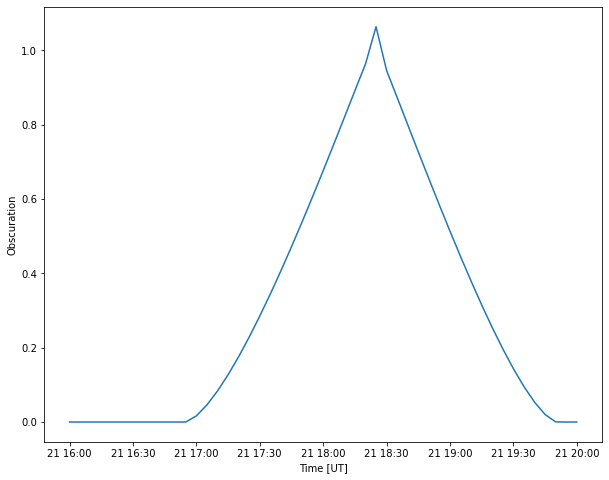

In [5]:
# Plot results
fig      = plt.figure(figsize=(10,8))
ax       = fig.add_subplot(111)
ax.plot(times,obsc)
ax.set_xlabel('Time [UT]')
ax.set_ylabel('Obscuration')
plt.show()

## Eclipse Map

In [6]:
date = datetime.datetime(2017,8,21,18)
precision = 4     # Grid Square Precision
height    = 300e3 # Height in meters

gs_grid     = eclipse_calc.locator.gridsquare_grid(precision=precision).flatten()
ll_grid     = eclipse_calc.locator.gridsquare2latlon(gs_grid)
lats,lons   = ll_grid

dd              = {}
dd['grid']      = gs_grid
dd['lat']       = lats
dd['lon']       = lons
dd['height']    = np.ones(lats.shape)*height
dates           = np.array(len(dd['lat'])*[date])
dd['obsc']      = eclipse_calc.calculate_obscuration(dates,dd['lat'],dd['lon'],height=dd['height'])

df          = pd.DataFrame(dd)
df          = df.set_index('grid')

In [7]:
df

,lat,lon,height,obsc
grid,,,,
AA00,-89.5,-179.0,300000.0,0.0
AA01,-88.5,-179.0,300000.0,0.0
AA02,-87.5,-179.0,300000.0,0.0
AA03,-86.5,-179.0,300000.0,0.0
AA04,-85.5,-179.0,300000.0,0.0
...,...,...,...,...
RR95,85.5,179.0,300000.0,0.0
RR96,86.5,179.0,300000.0,0.0
RR97,87.5,179.0,300000.0,0.0


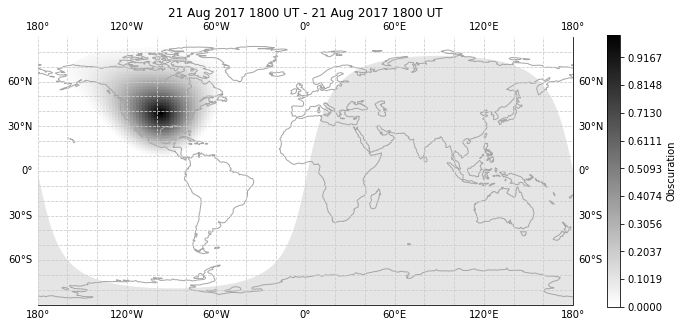

In [8]:
fig = plt.figure(figsize=(12,10))
crs = ccrs.PlateCarree()
ax  = fig.add_subplot(111,projection=crs)
hmap = eclipse_calc.maps.HamMap(date,ax=ax,crs=crs)
hmap.overlay_gridsquares(label_precision=0,major_style={'color':'0.8','linestyle':'--'})
hmap.overlay_gridsquare_data(dd['grid'],dd['obsc'],cmap=mpl.cm.gray_r,cbar_shrink=0.5,zorder=5,cbar_label='Obscuration')
plt.show()